In [1]:
#source: https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mood_data.csv to mood_data.csv


In [3]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['mood_data.csv']))
df.head()

,playlist_id,playlist_owner,playlist,id,name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,key_confidence,mode_confidence,tempo_confidence,time_signature_confidence,end_of_fade_in,start_of_fade_out,mood
0,37i9dQZF1DXdPec7aLTmlC,Spotify,Happy Hits!,6VrLYoQKdhu1Jruei06t65,Somebody To You,0.0587,0.526,185098,0.818,0.000000,3,0.333,-5.952,1,0.0358,171.960,4,0.896,0.359,0.701,0.149,0.982,0.19138,179.33351,Happy
1,37i9dQZF1DWSqBruwoIXkA,Spotify,sad hour,2fooMOezILHFlxkCqq3RRm,Rockland,0.7860,0.486,217369,0.402,0.000182,5,0.103,-11.389,1,0.0480,125.801,4,0.398,0.798,0.646,0.166,1.000,0.20893,207.52254,Sad
2,37i9dQZF1DXdPec7aLTmlC,Spotify,Happy Hits!,5KCbr5ndeby4y4ggthdiAb,Wonder,0.1310,0.333,172693,0.637,0.000018,1,0.149,-4.904,0,0.0581,139.898,4,0.132,0.107,0.337,0.303,0.340,0.20834,167.56680,Happy
3,37i9dQZF1DWXLSRKeL7KwM,Spotify,Energy Booster: Country,2EvddT8rcO99bKH0rDHAYG,We Are Tonight,0.0323,0.559,232107,0.812,0.000000,11,0.195,-5.347,1,0.0371,127.911,4,0.472,0.607,0.602,0.696,0.897,2.53678,213.43782,Energetic
4,37i9dQZF1DXdPec7aLTmlC,Spotify,Happy Hits!,78nplE9X2ZGvQh3TKgvldE,Rewrite The Stars (with James Arthur & Anne-Ma...,0.2370,0.670,218293,0.743,0.000000,10,0.465,-4.993,1,0.0393,125.944,4,0.571,0.586,0.420,0.952,0.977,2.74576,211.66150,Happy


In [4]:
from sklearn.model_selection import train_test_split
X = df[['acousticness','danceability','energy','instrumentalness','key','loudness','mode','speechiness','tempo','time_signature','valence']]
y = df['mood']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
X_test[0:1]

In [13]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.584


In [14]:
feature_imp = pd.Series(clf.feature_importances_,index=['acousticness','danceability','energy','instrumentalness','key','loudness','mode','speechiness','tempo','time_signature','valence']).sort_values(ascending=False)

No handles with labels found to put in legend.


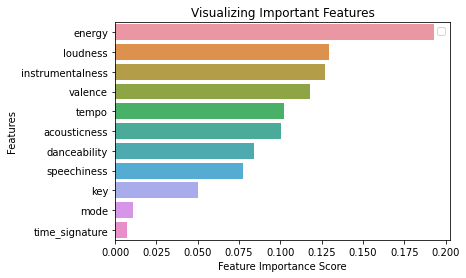

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
# removing time_signature, mode, key
X1 = df[['acousticness','danceability','energy','instrumentalness','loudness','speechiness','tempo','valence']]
y1 = df['mood']

# Split dataset into training set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=150, max_depth=12)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X1_train,y1_train)

y1_pred=clf1.predict(X1_test)

In [11]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.604
